In [2]:
import pandas as pd
import numpy as np
import math
import re
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import Reader
from surprise import accuracy

c:\anaconda3\envs\std\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\anaconda3\envs\std\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\anaconda3\envs\std\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [1]:
import pandas as pd
df = pd.read_csv("./team15/cleansed_data.csv", encoding='ISO-8859-1')

c:\anaconda3\envs\std\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\anaconda3\envs\std\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\anaconda3\envs\std\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
print(df.dtypes)

Unnamed: 0            int64
Id                   object
Title                object
User_id              object
review/score        float64
review/time           int64
review/text          object
review/predicted      int64
total_score         float64
dtype: object


In [14]:
import pandas as pd

# 기존의 books_data 데이터프레임 로드
# 예시로 사용하는 파일 경로에 맞게 수정해야 합니다.
books_data = pd.read_csv('books_data.csv')
books_data = books_data[books_data['Title'] != "THE STARS"]
# Title 컬럼을 소문자로 변환하여 새로운 컬럼 추가
books_data['Title_lower'] = books_data['Title'].str.lower()

# 중복된 책 제거
books_data_unique = books_data.drop_duplicates(subset='Title_lower', keep='first')

# 소문자로 변환한 컬럼은 삭제
books_data_unique = books_data_unique.drop(columns=['Title_lower'])

# 중복 제거된 데이터프레임을 출력하거나 저장
print(books_data_unique)

books_data_unique.to_csv('books_data.csv', index=False)

                                                    Title  \
0                          Its Only Art If Its Well Hung!   
1                                Dr. Seuss: American Icon   
2                   Wonderful Worship in Smaller Churches   
3                           Whispers of the Wicked Saints   
4       Nation Dance: Religion, Identity and Cultural ...   
...                                                   ...   
209451  The Orphan Of Ellis Island (Time Travel Advent...   
209452                            Red Boots for Christmas   
209453                                              Mamaw   
209454                                  The Autograph Man   
209455  Student's Solutions Manual for Johnson/Mowry's...   

                                              description  \
0                                                     NaN   
1       Philip Nel takes a fascinating look into the k...   
2       This resource includes twelve principles in un...   
3       Julia Thomas fi

In [12]:
books_data.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,Title_lower
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN,its only art if its well hung!
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,dr. seuss: american icon
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN,wonderful worship in smaller churches
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN,whispers of the wicked saints
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN,"nation dance: religion, identity and cultural ..."


In [3]:
# df.info()
print(df['Title'].count())

2999792


In [4]:
df.drop(df.columns[0],axis=1,inplace=True)

In [5]:
p = df.groupby('review/score')['review/score'].agg(['count'])
p

,count
review/score,
1.0,201688
2.0,151058
3.0,254295
4.0,585616
5.0,1807343


In [6]:
item_count = df["Title"].nunique()
user_count = df['User_id'].nunique()
rating_count = df["review/score"].count()

C:\Users\김동현\AppData\Local\Temp\ipykernel_21236\438424092.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(p.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'black', weight = 'bold')


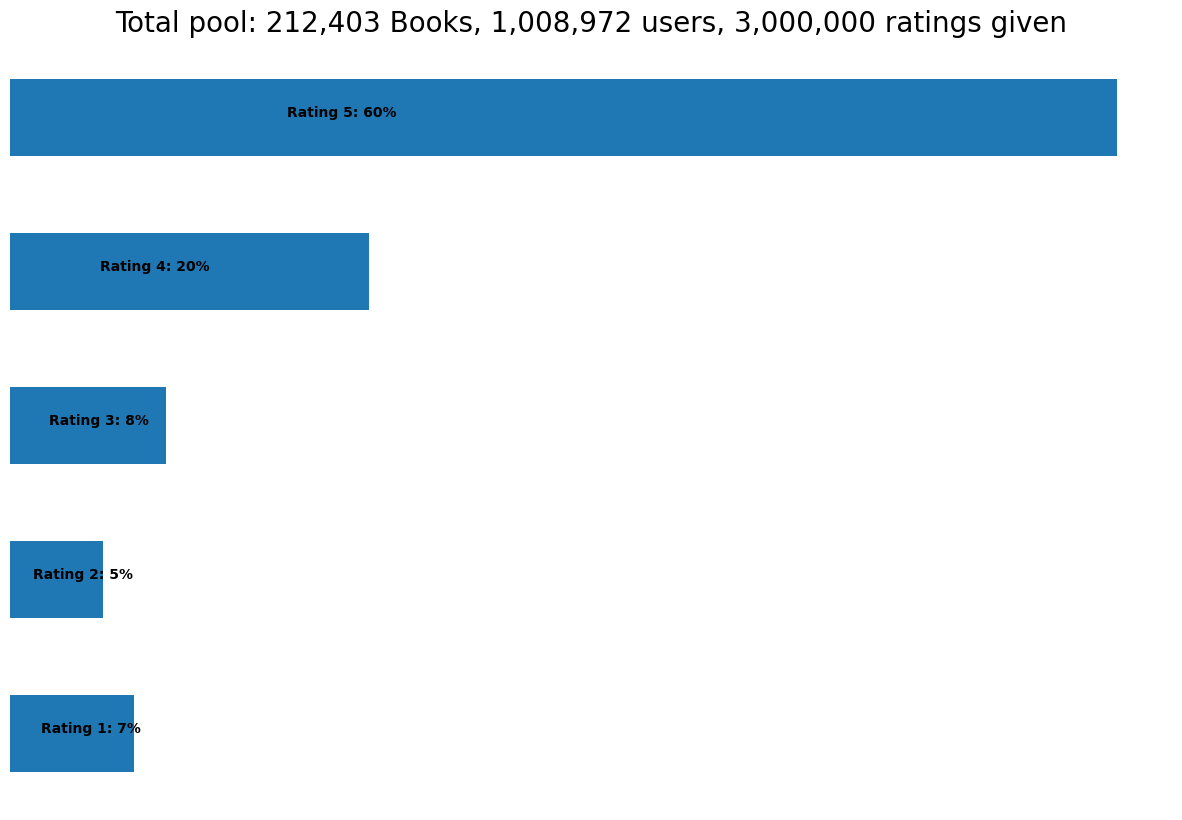

In [7]:
ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title('Total pool: {:,} Books, {:,} users, {:,} ratings given'.format(item_count, user_count, rating_count), fontsize=20)
plt.axis('off')
          
for i in range(1,6):
    ax.text(p.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'black', weight = 'bold')

In [16]:
df = pd.read_csv("./predict_score/predict_score.csv", encoding='ISO-8859-1')
df.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,review/predicted
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,3
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,4
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t...",4
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",4
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,2


5